# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [3]:
import pandas as pd

#import Data on well being from csv file
filename = './HSL.csv'
wlb = pd.read_csv(filename)

wlb.head(10)


,LOCATION,Country,TYPE_VAR,Type of indicator,VARIABLE,Indicator,WB,Current/Future Well-being,SEX,Sex,AGE,Age,EDUCATION,Education,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2004,2004,28476.0,NaN,NaN
1,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2005,2005,28730.0,NaN,NaN
2,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2006,2006,29777.0,NaN,NaN
3,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2007,2007,30911.0,NaN,NaN
4,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2008,2008,32475.0,NaN,NaN
5,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2009,2009,32205.0,NaN,NaN
6,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2010,2010,33505.0,NaN,NaN
7,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2011,2011,34050.0,NaN,NaN
8,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2012,2012,33617.0,NaN,NaN
9,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2013,2013,34011.0,NaN,NaN


In [4]:
#remove unnecessary/double information

drop_these = ['LOCATION', 'TYPE_VAR', 'VARIABLE', 'Sex', 'Education', 'Time', 'Flag Codes', 'Flags', 'Age', 'WB']
wlb.drop(drop_these, axis = 1, inplace=True)

#drop missing values

wlb.dropna(axis=0, subset=None, inplace=False)


wlb.head(10)

,Country,Type of indicator,Indicator,Current/Future Well-being,SEX,AGE,EDUCATION,TIME,Value
0,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2004,28476.0
1,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2005,28730.0
2,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2006,29777.0
3,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2007,30911.0
4,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2008,32475.0
5,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2009,32205.0
6,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2010,33505.0
7,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2011,34050.0
8,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2012,33617.0
9,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2013,34011.0


In [5]:
from pandas_datareader import wb

#download Data on GDP and rename

wb_gdp = wb.download(indicator='NY.GDP.PCAP.PP.CD', start=2004, end=2022)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.PP.CD':'GDP_per_capita,PPP'})


wb_gdp.head()


GDP_per_capita,PPP
country year                    
Canada  2021        52789.675434
        2020        47166.008979
        2019        49783.411866
        2018        49992.762276
        2017        48317.174584

In [6]:
#reset the index of a DataFrame
wb_gdp.reset_index(inplace=True)
wb_gdp.rename(columns = {'country':'Country'}, inplace=True)
wb_gdp.rename(columns = {'year':'TIME'}, inplace=True)

wb_gdp

,Country,TIME,"GDP_per_capita,PPP"
0,Canada,2021,52789.675434
1,Canada,2020,47166.008979
2,Canada,2019,49783.411866
3,Canada,2018,49992.762276
4,Canada,2017,48317.174584
5,Canada,2016,46472.340249
6,Canada,2015,44670.080539
7,Canada,2014,45753.750555
8,Canada,2013,44298.578734
9,Canada,2012,42290.965410


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

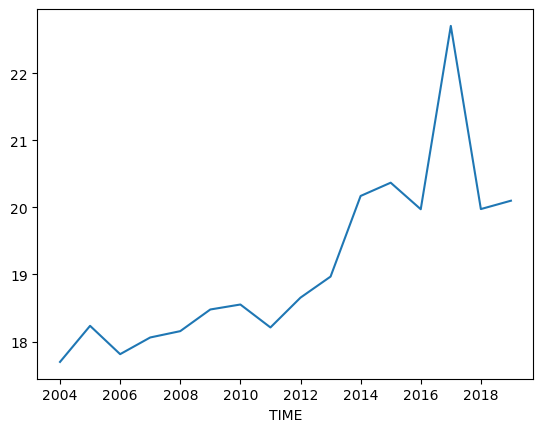

In [12]:
#clean data about wellbeing and filter for Canada

# Data frame with Canada
wlb_canada = wlb.loc[wlb['Country'] == 'Canada', :]
wlb_canada_av = wlb_canada.loc[wlb_canada['Type of indicator'] == 'Average', :]#probaly we could do this in one line but i dont know exactly how

wlb_data = wlb_canada_av.loc[wlb_canada_av['Indicator'] == 'Satisfaction with time use', :] #there ar only 2 values so we should use something else

#I think this might be a good proxy for well being, so we could plot it with the GDP?
wlb_social = wlb_canada_av.loc[wlb_canada_av['Indicator'] == 'Deaths from suicide, alcohol, drugs', :]



In [8]:
wlb_social

,Country,Type of indicator,Indicator,Current/Future Well-being,SEX,AGE,EDUCATION,TIME,Value
1712,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2004,17.166006
1713,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2005,18.513002
1714,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2006,19.205826
1715,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2007,17.117743
1716,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2008,16.724621
1717,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2009,17.194693
1718,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2010,15.872722
1719,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2011,16.036577
1720,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2012,15.719962
1721,Denmark,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2013,14.730195


**Interactive plot** :

In [215]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [14]:
#convert a non-existent column to string data type 
wlb_social['TIME'] = wlb_social['TIME'].astype(str)
wb_gdp['TIME'] = wb_gdp['TIME'].astype(str)
wlb_social['Country'] = wlb_social['Country'].astype(str)
wb_gdp['Country'] = wb_gdp['Country'].astype(str)

#inner merge
inner = pd.merge(wlb_social,wb_gdp,how='inner',on=['Country','TIME'])
inner


C:\Users\Yas\AppData\Local\Temp\ipykernel_34240\3959701304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlb_social['TIME'] = wlb_social['TIME'].astype(str)
C:\Users\Yas\AppData\Local\Temp\ipykernel_34240\3959701304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlb_social['Country'] = wlb_social['Country'].astype(str)


,Country,Type of indicator,Indicator,Current/Future Well-being,SEX,AGE,EDUCATION,TIME,Value,"GDP_per_capita,PPP"
0,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2004,17.696274,33925.706732
1,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2005,18.234295,36327.228654
2,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2006,17.811861,38119.413196
3,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2007,18.060709,39575.309748
4,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2008,18.155138,40376.306880
5,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2009,18.477999,38865.413458
6,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2010,18.552164,40099.448239
7,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2011,18.210234,41666.707627
8,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2012,18.654758,42290.965410
9,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2013,18.968445,44298.578734


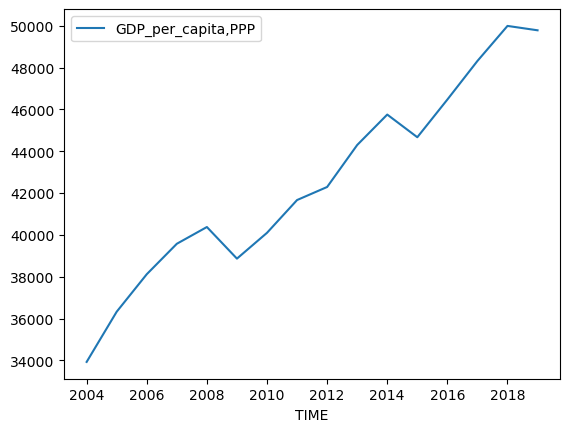

In [21]:
#plot how GDP changes over the years 

ax = inner.plot(x='TIME', y='GDP_per_capita,PPP', label = 'GDP_per_capita,PPP')
ax.legend()
plt.show()

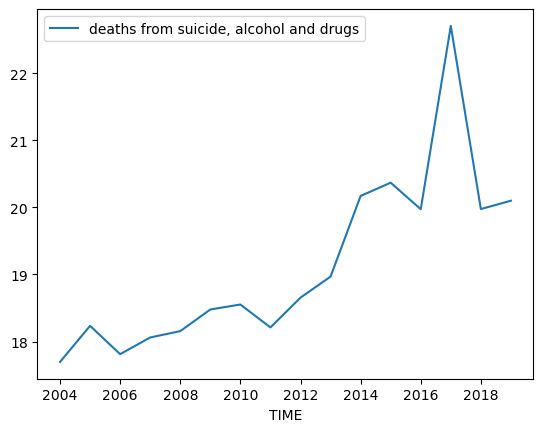

In [20]:
# Plot the values of deaths from suicide, alcohol and drugs over time 
ax = inner.plot(x='TIME',y='Value', label = 'deaths from suicide, alcohol and drugs');
ax.legend()
plt.show()

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

For the simplicity we decide to focus on only one OECD country: Canada. We expect the effects to be similar in other OECD countries. 

GDP: 
There is a clear upwards trend in GDP with some little irregularities in 2009 and 2015. The bump in 2009 could be explained by the financial crisis for instance. However overall we can consider GDP per capita to be growing between 2004 and 2018. 

Well being: 
We choose to use the variable "Deaths from suicide, alcohol, drugs" as a proxy for wellbeing. In a country where people are happy these variable can expected to be low. 

We can see an upwards trend in Deaths from suicide, alcohol, drugs, meaning that wellbeing is getting worse. Noteworthy is forthermore the peak in the year 2017 where the variable took its highest values. 

Hence we can see an upwards trend for both variables. This arises the question if with rising GDP the deaths from suicide, alcohol, drugs rise what would mean wellbeing is decreasing.  

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.